In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

#Import thư viện và dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv',engine='python', error_bad_lines=False)

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print(df.shape)
checknull=[col for col in df.columns if df[col].isnull().sum() > 0]
print(checknull)

(50000, 2)
[]


=> Không có missing value

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


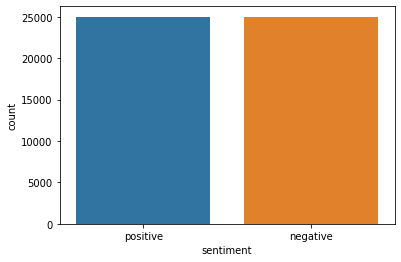

,review
sentiment,
negative,25000
positive,25000


In [ ]:
sns.countplot('sentiment',data=df)
plt.show()
print()
df.groupby(['sentiment']).count()

Tỷ lệ nhãn positive và negative bằng nhau

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#Tiền xử lý dữ liệu

Loại bỏ các stopword và các ký tự đặc biệt

In [ ]:
def remove_tags(string):
    text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"
    result = re.sub(text_cleaning_regex,' ',string)         
    result = result.lower()
    return result
df['review']=df['review'].apply(lambda cw : remove_tags(cw))
df['review'].head(10)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s love in the time of money is a...
5    probably my all time favorite movie a story of...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

Loại bỏ các stop word trong tiếng Anh như your, are, once,... những từ không có quá nhiều tác dụng trong dự đoán target word và context word

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
print()
df['review']=df['review'].apply(lambda cw: ' '.join(word for word in cw.split() if word not in stop_words))
df['review'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'them', 'into', 'just', "wasn't", 'during', 'some', 'should', 'itself', 'of', 'both', "mightn't", 'your', 'will', 'each', "hasn't", 'up', 'further', "needn't", 'we', 'once', 'no', 've', 'these', "it's", 'theirs', 'because', 'shouldn', 'was', 'll', 'didn', 'while', 'ma', 'between', 'having', 'before', "she's", "shouldn't", 'doesn', 'is', 'y', 'a', 'there', 'him', 'other', 'its', "you'd", 'then', 'can', 'doing', 'do', 'what', "haven't", 'below', 'on', 'but', 'it', 'same', 'hasn', 'won', 'does', "shan't", 'if', 'for', "weren't", 'until', 'my', 'has', 'very', "couldn't", 'who', 'haven', "mustn't", "won't", 'he', 'only', "hadn't", "aren't", 'about', 'why', 'wouldn', "that'll", 'they', 'being', 'hers', 'here', 'through', 'me', 'our', "you've", 'i', 'ours', 'from', 'to', 'the', "should've", 'have', 'hadn', "isn't", 'ourselves', 'above', 'not', "you'll", 'after', 'yourselves', "wouldn't", 'and', 'am', 'weren', 'this', 'his', 'few', 'most', 'shan', 'so', 'are', 's', 'against', 'been', 'under',

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
5    probably time favorite movie story selflessnes...
6    sure would like see resurrection dated seahunt...
7    show amazing fresh innovative idea 70 first ai...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
Name: review, dtype: object

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

Chuyển các từ về dạng nguyên bản bằng WordNet Lemmatizer. Việc sử dụng Lemmatizer giúp giảm khối lượng tính toán vì từ gốc mang đủ nghĩa của từ.

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['review'] = df['review'].apply(lambda cw: lemmatize_text(cw))
df

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


Label Encoder để chuyển nhãn dữ liệu từ Positive/Negative về 1/0 và chia dữ liệu thành training/test set

In [ ]:
reviews = df['review'].values
labels = df['sentiment'].values
print(labels)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels)
train_sentences, test_sentences, train_labels, test_labels=\
train_test_split(reviews,encoded_labels , test_size=0.2,random_state=16)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']
[1 1 1 ... 0 0 0]


Tìm độ dài trung bình của các bình luận

In [ ]:
s = 0.0
for i in df['review']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/df.shape[0])

Average length of each review :  123.65584


#Tokenizing và Pad Sequence

Tokenizing: Xây dựng thư viện với các từ được lấy từ dữ liệu. Mỗi từ sẽ có một số thứ tự riêng biệt tương ứng.
Padding: Chuyển tất cả các comment về cùng độ dài

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Hyperparameters of the model
vocab_size = 5000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

#Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 100, input_length=200),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          500000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 587,601
Trainable params: 587,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training = model.fit(train_padded, train_labels, batch_size=1024, epochs=10,
                    validation_data=(test_padded, test_labels))

Epoch 1/10
40/40 [==============================] - 314s 8s/step - loss: 0.5924 - accuracy: 0.6709 - val_loss: 0.3315 - val_accuracy: 0.8642
Epoch 2/10
40/40 [==============================] - 316s 8s/step - loss: 0.2883 - accuracy: 0.8851 - val_loss: 0.2855 - val_accuracy: 0.8887
Epoch 3/10
40/40 [==============================] - 312s 8s/step - loss: 0.2387 - accuracy: 0.9091 - val_loss: 0.2760 - val_accuracy: 0.8844
Epoch 4/10
40/40 [==============================] - 321s 8s/step - loss: 0.2195 - accuracy: 0.9178 - val_loss: 0.2939 - val_accuracy: 0.8860
Epoch 5/10
40/40 [==============================] - 315s 8s/step - loss: 0.2092 - accuracy: 0.9223 - val_loss: 0.2946 - val_accuracy: 0.8858
Epoch 6/10
40/40 [==============================] - 326s 8s/step - loss: 0.1951 - accuracy: 0.9271 - val_loss: 0.3094 - val_accuracy: 0.8869
Epoch 7/10
40/40 [==============================] - 321s 8s/step - loss: 0.1837 - accuracy: 0.9331 - val_loss: 0.3463 - val_accuracy: 0.8827
Epoch 8/10
40

In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

Accuracy of prediction on test set :  0.8806


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4983
           1       0.87      0.90      0.88      5017

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this", 
            "the movie plot is terrible but it had good acting"]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

The movie was very touching and heart whelming
Predicted sentiment :  Positive
I have never seen a terrible movie like this
Predicted sentiment :  Negative
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative
